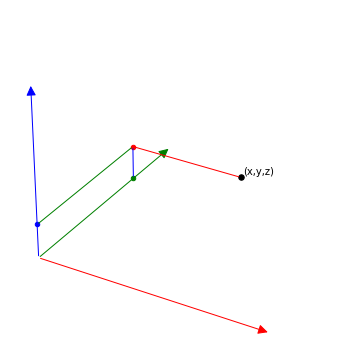

In [69]:
import matplotlib.collections
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple


from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)


def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)


from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        return True

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D, 'arrow3D', _arrow3D)

fig = plt.figure( figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.arrow3D(0,0,0,
           1,0,0,
           mutation_scale=20,
           arrowstyle="-|>",color="red",
           linestyle='solid')
ax.arrow3D(0,0,0,
           0,1,0,
           mutation_scale=20,
           arrowstyle="-|>",color="green",
           linestyle='solid')    

ax.arrow3D(0,0,0,
           0,0,1,
           mutation_scale=20,
           arrowstyle="-|>",color="blue",
           linestyle='solid')                   

x = 0.5
y = 0.7
z = 0.2
ax.scatter([x], [y], [z], s=30, marker='o', color='black')
ax.scatter([0], [y], [z], s=20, marker='o', color='red')
ax.scatter([0], [y], [0], s=20, marker='o', color='green')
ax.scatter([0], [0], [z], s=20, marker='o', color='blue')
ax.annotate3D('(x,y,z)', (x, y, z), xytext=(3, 3), textcoords='offset points')


ax.arrow3D(x,y,z,
           -x,0,0,
           mutation_scale=20,
           arrowstyle="-",color="red",
           linestyle='solid')   

ax.arrow3D(0,y,z,
           0,-y,0,
           mutation_scale=20,
           arrowstyle="-",color="green",
           linestyle='solid')        

ax.arrow3D(0,y,0,
           0,0,z,
           mutation_scale=20,
           arrowstyle="-",color="blue",
           linestyle='solid')                    

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.grid(False)
ax.axis(False)
ax.set_xlim3d(0,0.8)
ax.set_ylim3d(0,0.8)
ax.set_zlim3d(0,0.8)    
fig.tight_layout()
fig.savefig("Images/plt1")

MovieWriter ffmpeg unavailable; using Pillow instead.


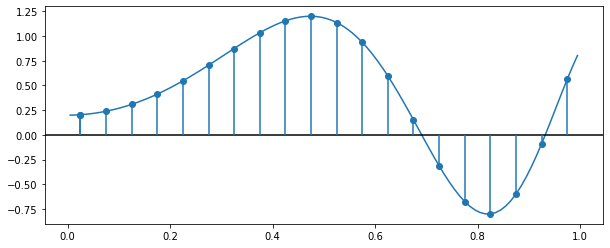

In [70]:
from matplotlib.collections import LineCollection
import numpy as np
from functools import partial
from matplotlib.animation import FuncAnimation
from IPython import display


facttable = [math.factorial(x) for x in range(0, 100)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

# The Legendre polynomials


def P(l, m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    #  evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0

    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0
    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm
    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1
    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll

def SampleFunc(func, samplePoints):
    return [func(x) for x in samplePoints]


def FuncProduct(func1, func2, samplePoints):
    v1 = []
    v2 = []
    product = []

    v1 = SampleFunc(func1, samplePoints)
    v2 = SampleFunc(func2, samplePoints)
    product = np.array(v1)*np.array(v2)

    return product


def func1(x):
    return math.sin(x*x*7)+0.2


lowResSamples = [(x+0.5)/M for x in range(20)]
hiResSamples = [(x+0.5)/N for x in range(100)]


func1LowResSamples = SampleFunc(func1, lowResSamples)
func1HiResSamples = SampleFunc(func1, hiResSamples)

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 4))
axes.plot(hiResSamples, SampleFunc(func1, hiResSamples))
axes.axhline(0, color='black')
global scatterX 
global scatterY 

scatterX=[]
scatterY=[]
segs=[]
sc = axes.scatter(scatterX, scatterY)

vl = axes.vlines([],[],[])


def AnimationFunction(frame):
    x = lowResSamples[frame]
    y = func1LowResSamples[frame]
    scatterX.append(x)
    scatterY.append(y)
    segs.append(  ((x,0),(x,y))    )
    sc.set_offsets(np.c_[scatterX,scatterY])
    vl.set_segments(segs)

anim_created = FuncAnimation(fig, AnimationFunction, frames=M, interval=2000)
anim_created.save("Images/sampleFunc.gif")




In [71]:

def funcBasis(band,resolution,x):
    m = (band+0.5)/resolution
    if abs(x- m)<0.01:
        return 1
    return 0

def getLM(idx):
    if (idx == 0):
        l=0
        m=0
        return l,m
    x = 2
    l=1
    a = 2
    b = 0
    b += l*2+1
    mid = b-l//2

    while idx >b:
        l+=1
        b += l*2+1
        mid = b-(l*2+1)//2
    return l,idx-mid

def funcBasisP(l,m,x):
    return P(l,m,x)

funcBasis = funcBasisP
# fig,axes = plt.subplots(nrows=25, ncols=1)
# fig.set_size_inches((10,50))
# i = 0
# lowResSamples = np.linspace(-1,1,25)
# for ax in axes:
#     ax.axhline(0, color='black')
#     e = partial(funcBasis,i,M)
#     ax.plot(lowResSamples,SampleFunc(e,lowResSamples))
#     ax.set_title("e{0}".format(i))
#     i+=1

# fig.savefig("Images/basis")

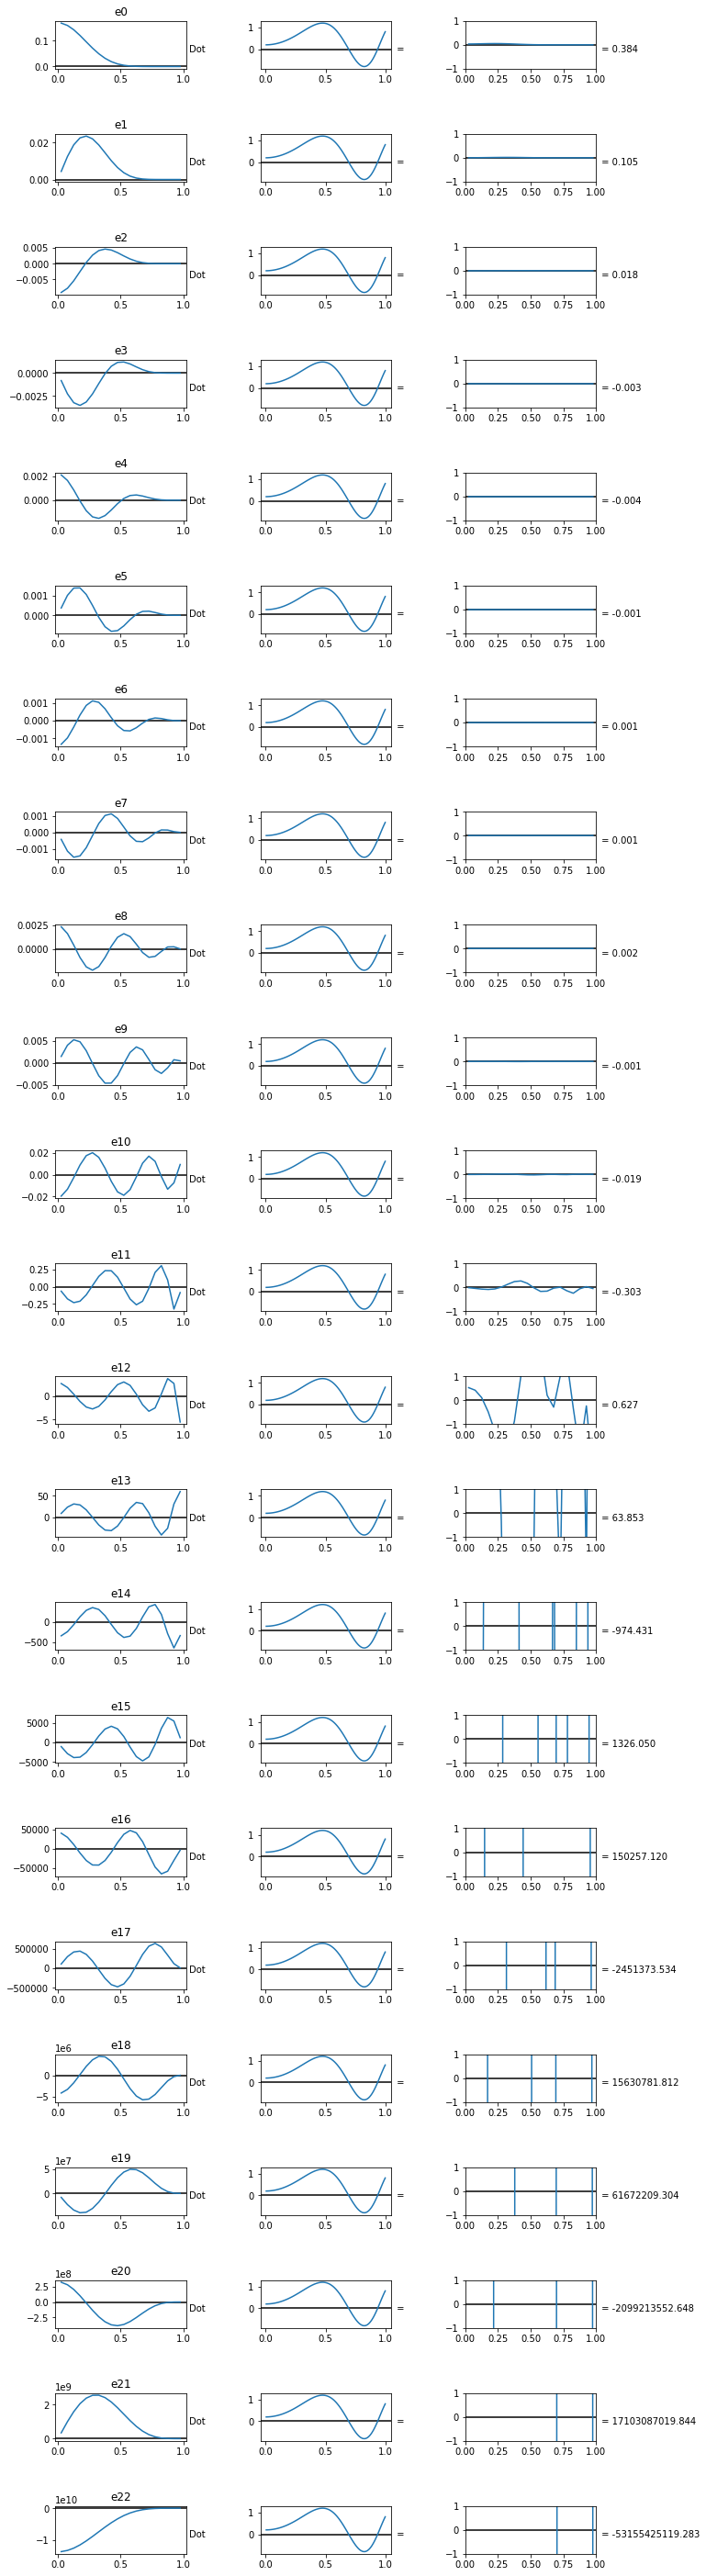

In [72]:

fig,axes = plt.subplots(nrows=23, ncols=3)
fig.set_size_inches((10,40))
i = 0
fig.tight_layout(pad=5.0)
coeffs=[]
for row in axes:
    ax = row[0]
    ax.axhline(0, color='black')
    e = partial(funcBasisP,11,i-11)
    ax.plot(lowResSamples,SampleFunc(e,lowResSamples))
    ax.set_title("e{0}".format(i))
    
    ax.text(1.02, 0.5, 'Dot',
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)
    ax = row[1]
    ax.axhline(0, color='black')
    ax.plot(hiResSamples,func1HiResSamples)
    ax.text(1.02, 0.5, ' = ',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

    ax = row[2]
    ax.axhline(0, color='black')
    ax.plot(lowResSamples,FuncProduct(func1,e,lowResSamples))
    ax.set_xlim((0,1))
    ax.set_ylim((-1,1))

    
    coeffs.append(np.sum(FuncProduct(func1,e,lowResSamples)))
    ax.text(1.02, 0.5, ' = {:.3f}'.format(coeffs[-1]),
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
    i+=1
fig.savefig("Images/projection")

In [74]:
#rebuild
def rebuild(coeffs,basis, resolution):
    ret = np.zeros(resolution)
    idx = 0
    for coeff in coeffs:
        samples = np.array(SampleFunc(basis[idx],lowResSamples))
        ret += samples * coeff
        idx += 1
    return ret


y = rebuild(coeffs, [partial(funcBasis,11,x-11) for x in range(23)],23)


fig,axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10,4))
plt.plot(lowResSamples,y)
plt.axhline(0, color='black')
fig.savefig("Images/rebuilt")



# fig,axes = plt.subplots(nrows=10, ncols=2)
# fig.set_size_inches((10,20))
# i = 0
# fig.tight_layout(pad=5.0)

# def partialSampleRetuilt( sampledRebuilt , n):
#     ret = []
#     for i in range(M):
#         if ( i <= n):
#             ret.append(sampledRebuilt[i])
#         else:
#             ret.append(0)
#     return ret
    


# for row in axes:
#     ax = row[0]
#     ax.axhline(0, color='black')
#     e = partial(funcBasis,(i+0.5)/M)
#     ax.plot(samples,SampleFunc(e,samples))
#     ax.set_title("e{0}".format(i))
    
#     ax.text(1.02, 0.5, ' * {:.3f} = '.format(coeffs[i]),
#             horizontalalignment='left',
#             verticalalignment='top',
#             transform=ax.transAxes)
#     ax = row[1]
#     ax.axhline(0, color='black')
#     ax.plot(samples,partialSampleRetuilt(y,i))
#     ax.text(1.02, 0.5, ' + ',
#                 horizontalalignment='left',
#                 verticalalignment='top',
#                 transform=ax.transAxes)

#     i+=1
# fig.savefig("Images/rebuilt2")

ValueError: operands could not be broadcast together with shapes (23,) (20,) (23,) 